In [1]:
%run functions.ipynb
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


## Feature selection based on SAM

In [2]:
scoring = 'roc_auc'
cv = 4
cv_out = 5
cv_in = 2
n_iter = 50
n_jobs = 4

In [3]:
X_train, X_test, y_train, y_test = load_train_and_test_parts()
print("Train and test sizes: {} {}".format(X_train.shape, X_test.shape))
print("(1, 0) labels count in train test: {} {}".format((np.count_nonzero(y_train==1), np.count_nonzero(y_train==0)), 
                                                        (np.count_nonzero(y_test==1), np.count_nonzero(y_test==0))))

Train and test sizes: (726, 12179) (243, 12179)
(1, 0) labels count in train test: (289, 437) (104, 139)


In [4]:
sam_filenames = get_sam_result_files()

In [5]:
sam_scores = {}
for filename in sam_filenames:
    models_logit_sam = fit_dim_reduction_pipeline(SAMSelection(filename=filename), {}, X_train, y_train, 
                                              n_iter=n_iter, cv=cv, n_jobs=n_jobs, scoring=scoring)
    _, _, roc_auc = calculate_roc_score(models_logit_sam, X_test, y_test)
    
    start_index = filename.rfind('_') + 1
    end_index = filename.rfind('.')
    sam_scores[int(filename[start_index:end_index])] = roc_auc

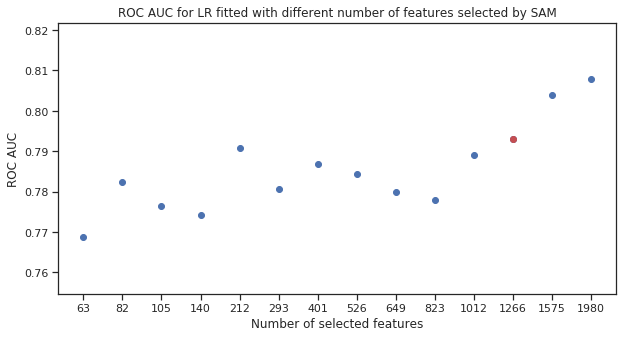

In [6]:
sorted_keys = sorted(sam_scores.keys())
figure(figsize = (10,5))
scatter([str(x) for x in sorted_keys], [sam_scores[key] for key in sorted_keys])
scatter(['1266'], [sam_scores[1266]], c='r')
xlabel('Number of selected features')
ylabel('ROC AUC')
title('ROC AUC for LR fitted with different number of features selected by SAM')
show()

In [7]:
print(sam_scores[212], sam_scores[1266])

0.7906751521859435 0.7930962921970116
